In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.linear_model import LinearRegression
from scipy.stats import theilslopes

mpl.rcParams['figure.dpi'] = 300

In [18]:
def plot_annual_mean_multiple(year_temp_dict_coll, colors, names, plot_save_path, display_coef=False, check_years=True, use_theil=False):
   """Create and save the output figure.

   The plot is just mean values of multiple models

   Inputs:
   year_temp_dict_coll - list of lists of years mapped to ts
   colors - list of colors to draw temperature with
   names - names of model

   Outputs:
   Saved figure
   """
   fig, ax = plt.subplots()
   plt.gcf().set_size_inches(10, plt.gcf().get_size_inches()[1])

   ax.set_xlabel('Год')
   ax.set_ylabel(r"Температура поверхностного слоя, ${\degree}C$")

   years = list(year_temp_dict_coll[0].keys())
   if check_years:
      for d in year_temp_dict_coll:
         years = np.intersect1d(list(years), list(d.keys()))
   else:
      years = list(set([year for year_temp_dict in year_temp_dict_coll for year in year_temp_dict.keys()]))

   ax.set_xticks(np.array(years))
   ax.tick_params(axis='x', labelrotation=300)

   for i, (yt_dict, name) in enumerate(zip(year_temp_dict_coll, names)):
      tss = [yt_dict[year] for year in years if year in yt_dict]
      ys = [year for year in years if year in yt_dict]
      regression_years = np.array(ys).reshape(-1,1)

      if(use_theil):
         coef, intercept, _, _ = theilslopes(tss, regression_years)

         ax.plot(
            ys,
            intercept + coef * regression_years,
            linewidth=0.5,
            color=colors(i, alpha=0.4),
            # label=f"Линейная регрессия {name}"
         )
      else:
         regressor = LinearRegression().fit(regression_years, tss)
         coef = regressor.coef_[0]

         ax.plot(
            ys,
            regressor.predict(regression_years),
            linewidth=0.5,
            color=colors(i, alpha=0.4),
            # label=f"Линейная регрессия {name}"
         )

      ax.plot(
         ys,
         tss,
         linewidth=1.5,
         color=colors(i),
         # label=f"Данные {name}"
         label=f"{name}"
      )


      if display_coef:
         ax.text(
            x=0.815,
            y=0.95 - i*0.1,
            s=f"$\it{{{name}: {coef:.2f}}}{{\degree}}C/год$",
            horizontalalignment='center',
            verticalalignment='top',
            transform = ax.transAxes,
            bbox=dict(facecolor='white', alpha=0.2))
      
   ax.legend(loc="upper left", fontsize=6)

   plt.savefig(plot_save_path)

def plot_annual_mean(yt_dict, name, plot_save_path, use_theil=False):
   """Create and save the output figure.

   The plot is just mean values

   Inputs:

   Outputs:
   Saved figure
   """
   fig, ax = plt.subplots()
   plt.gcf().set_size_inches(10, plt.gcf().get_size_inches()[1])

   ax.set_xlabel('Год')
   ax.set_ylabel(r"Температура поверхностного слоя, ${\degree}C$")

   years = np.array(list(yt_dict.keys()))
   tss = np.array(list(yt_dict.values()))

   ax.set_xticks(years)
   ax.tick_params(axis='x', labelrotation=300)

   regression_years = np.array(years).reshape(-1,1)
   regressor = LinearRegression().fit(regression_years, tss)

   ax.plot(
      years,
      tss,
      linewidth=1.5,
      color="black",
      # label=f"Данные {name}"
      label=f"{name}"
   )

   if(use_theil):
      coef, intercept, _, _ = theilslopes(tss, regression_years)

      ax.plot(
         years,
         intercept + coef * years,
         linewidth=0.5,
         color="black",
         # label=f"Линейная регрессия {name}"
      )
   else:
      regressor = LinearRegression().fit(regression_years, tss)
      coef = regressor.coef_[0]

      ax.plot(
         years,
         regressor.predict(regression_years),
         linewidth=0.5,
         color="black",
         # label=f"Линейная регрессия {name}"
      )

   ax.text(
      x=0.9,
      y=0.95,
      s=f"$\it{{Тренд: {coef:.2f}}}{{\degree}}C/год$",
      horizontalalignment='center',
      verticalalignment='top',
      transform = ax.transAxes,
      bbox=dict(facecolor='white', alpha=0.2))
   
   ax.legend(loc="upper left")

   plt.savefig(plot_save_path)

<>:71: SyntaxWarning: invalid escape sequence '\i'
<>:71: SyntaxWarning: invalid escape sequence '\d'
<>:140: SyntaxWarning: invalid escape sequence '\i'
<>:140: SyntaxWarning: invalid escape sequence '\d'
<>:71: SyntaxWarning: invalid escape sequence '\i'
<>:71: SyntaxWarning: invalid escape sequence '\d'
<>:140: SyntaxWarning: invalid escape sequence '\i'
<>:140: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_44982/1785042642.py:71: SyntaxWarning: invalid escape sequence '\i'
  s=f"$\it{{{name}: {coef:.2f}}}{{\degree}}C/год$",
/tmp/ipykernel_44982/1785042642.py:71: SyntaxWarning: invalid escape sequence '\d'
  s=f"$\it{{{name}: {coef:.2f}}}{{\degree}}C/год$",
/tmp/ipykernel_44982/1785042642.py:140: SyntaxWarning: invalid escape sequence '\i'
  s=f"$\it{{Тренд: {coef:.2f}}}{{\degree}}C/год$",
/tmp/ipykernel_44982/1785042642.py:140: SyntaxWarning: invalid escape sequence '\d'
  s=f"$\it{{Тренд: {coef:.2f}}}{{\degree}}C/год$",


In [22]:
lst_m11 = {2001: 8.518391334434845,
 2002: 10.562313431334651,
 2003: 7.857616372707389,
 2004: 7.395629688897221,
 2005: 9.14143065926696,
 2006: 7.007350175325124,
 2007: 9.94451399113264,
 2008: 8.258408651177756,
 2009: 8.258186946255545,
 2010: 7.098301657039377,
 2011: 8.083154459303568,
 2012: 9.068294740221727,
 2013: 8.22769966377824,
 2014: 10.313111054749466,
 2015: 10.214666106018871,
 2016: 10.278019374073171,
 2017: 9.111631967910679,
 2018: 9.083092106624825,
 2019: 9.750912104506595,
 2020: 10.673629396456128,
 2021: 8.178589646995642,
 2022: 8.422860681650373,
 2023: 10.092309299156067,
 2024: 9.718802938390988}

lst_m21 = {2001: 6.523447096502005,
 2002: 11.087026927344537,
 2003: 8.227190985636412,
 2004: 7.918499190633716,
 2005: 9.834607190557838,
 2006: 7.375761008911375,
 2007: 10.603713281690437,
 2008: 8.734014051703918,
 2009: 8.932528225671893,
 2010: 7.71452877253441,
 2011: 8.775993993759588,
 2012: 9.776709236956195,
 2013: 8.83295322142326,
 2014: 10.90875064506874,
 2015: 11.124346848601931,
 2016: 11.072499313254557,
 2017: 9.697003172751204,
 2018: 9.721762029880114,
 2019: 10.577461115660952,
 2020: 11.42118506104802,
 2021: 8.943680470222272,
 2022: 9.072915370205486,
 2023: 11.284890175973027,
 2024: 10.757315581774394}

lst_landsat = { 1990: 9.879765511679397,
 1991: 8.954173718890887,
 1992: 4.1181207001714135,
 1993: 10.058721180744957,
 1994: 9.22601766201506,
 1995: 7.868444791330705,
 1996: 7.615046916830711,
 1997: 6.4652446881016505,
 1998: 8.29735257295523,
 1999: 7.466276454270664,
 2000: 8.444648433179971,
 2001: 6.8573912127145835,
 2002: 11.29452174088983,
 2003: 8.133507938438473,
 2004: 7.756460249341295,
 2005: 8.815491983317168,
 2006: 6.796633766422254,
 2007: 9.983745663150753,
 2008: 8.444456981800055,
 2009: 7.979558202903978,
 2010: 7.409646087737466,
 2011: 7.802575171575934,
 2012: 8.998809616805136,
 2013: 9.029895691880107,
 2014: 10.268777774431134,
 2015: 10.722652392625395,
 2016: 10.075703142279956,
 2017: 9.112241223415538,
 2018: 9.1208041147658,
 2019: 9.838905106835822,
 2020: 10.8137280883284,
 2021: 8.059809265577483,
 2022: 8.255228706723798,
 2023: 9.533078486705547,
 2024: 9.525957321098034}

lst_era5 = { 1996: 9.450155880882175,
 1997: 10.306804804710536,
 1998: 10.124025263851733,
 1999: 9.953970489104826,
 2000: 10.897080923980255,
 2001: 11.237577393579986,
 2002: 11.02499017361202,
 2003: 10.489261758126426,
 2004: 10.945637833437745,
 2005: 11.244417451457139,
 2006: 10.083577737021876,
 2007: 11.765040295289413,
 2008: 11.061690752218151,
 2009: 10.35989784117505,
 2010: 10.440376515999297,
 2011: 11.403798160090886,
 2012: 10.77953644155891,
 2013: 9.971784275350128,
 2014: 11.108825121667898,
 2015: 12.168882374570854,
 2016: 11.078814723490853,
 2017: 10.931184669283283,
 2018: 11.564613195835445,
 2019: 11.313782876770295,
 2020: 10.744542470002987 }

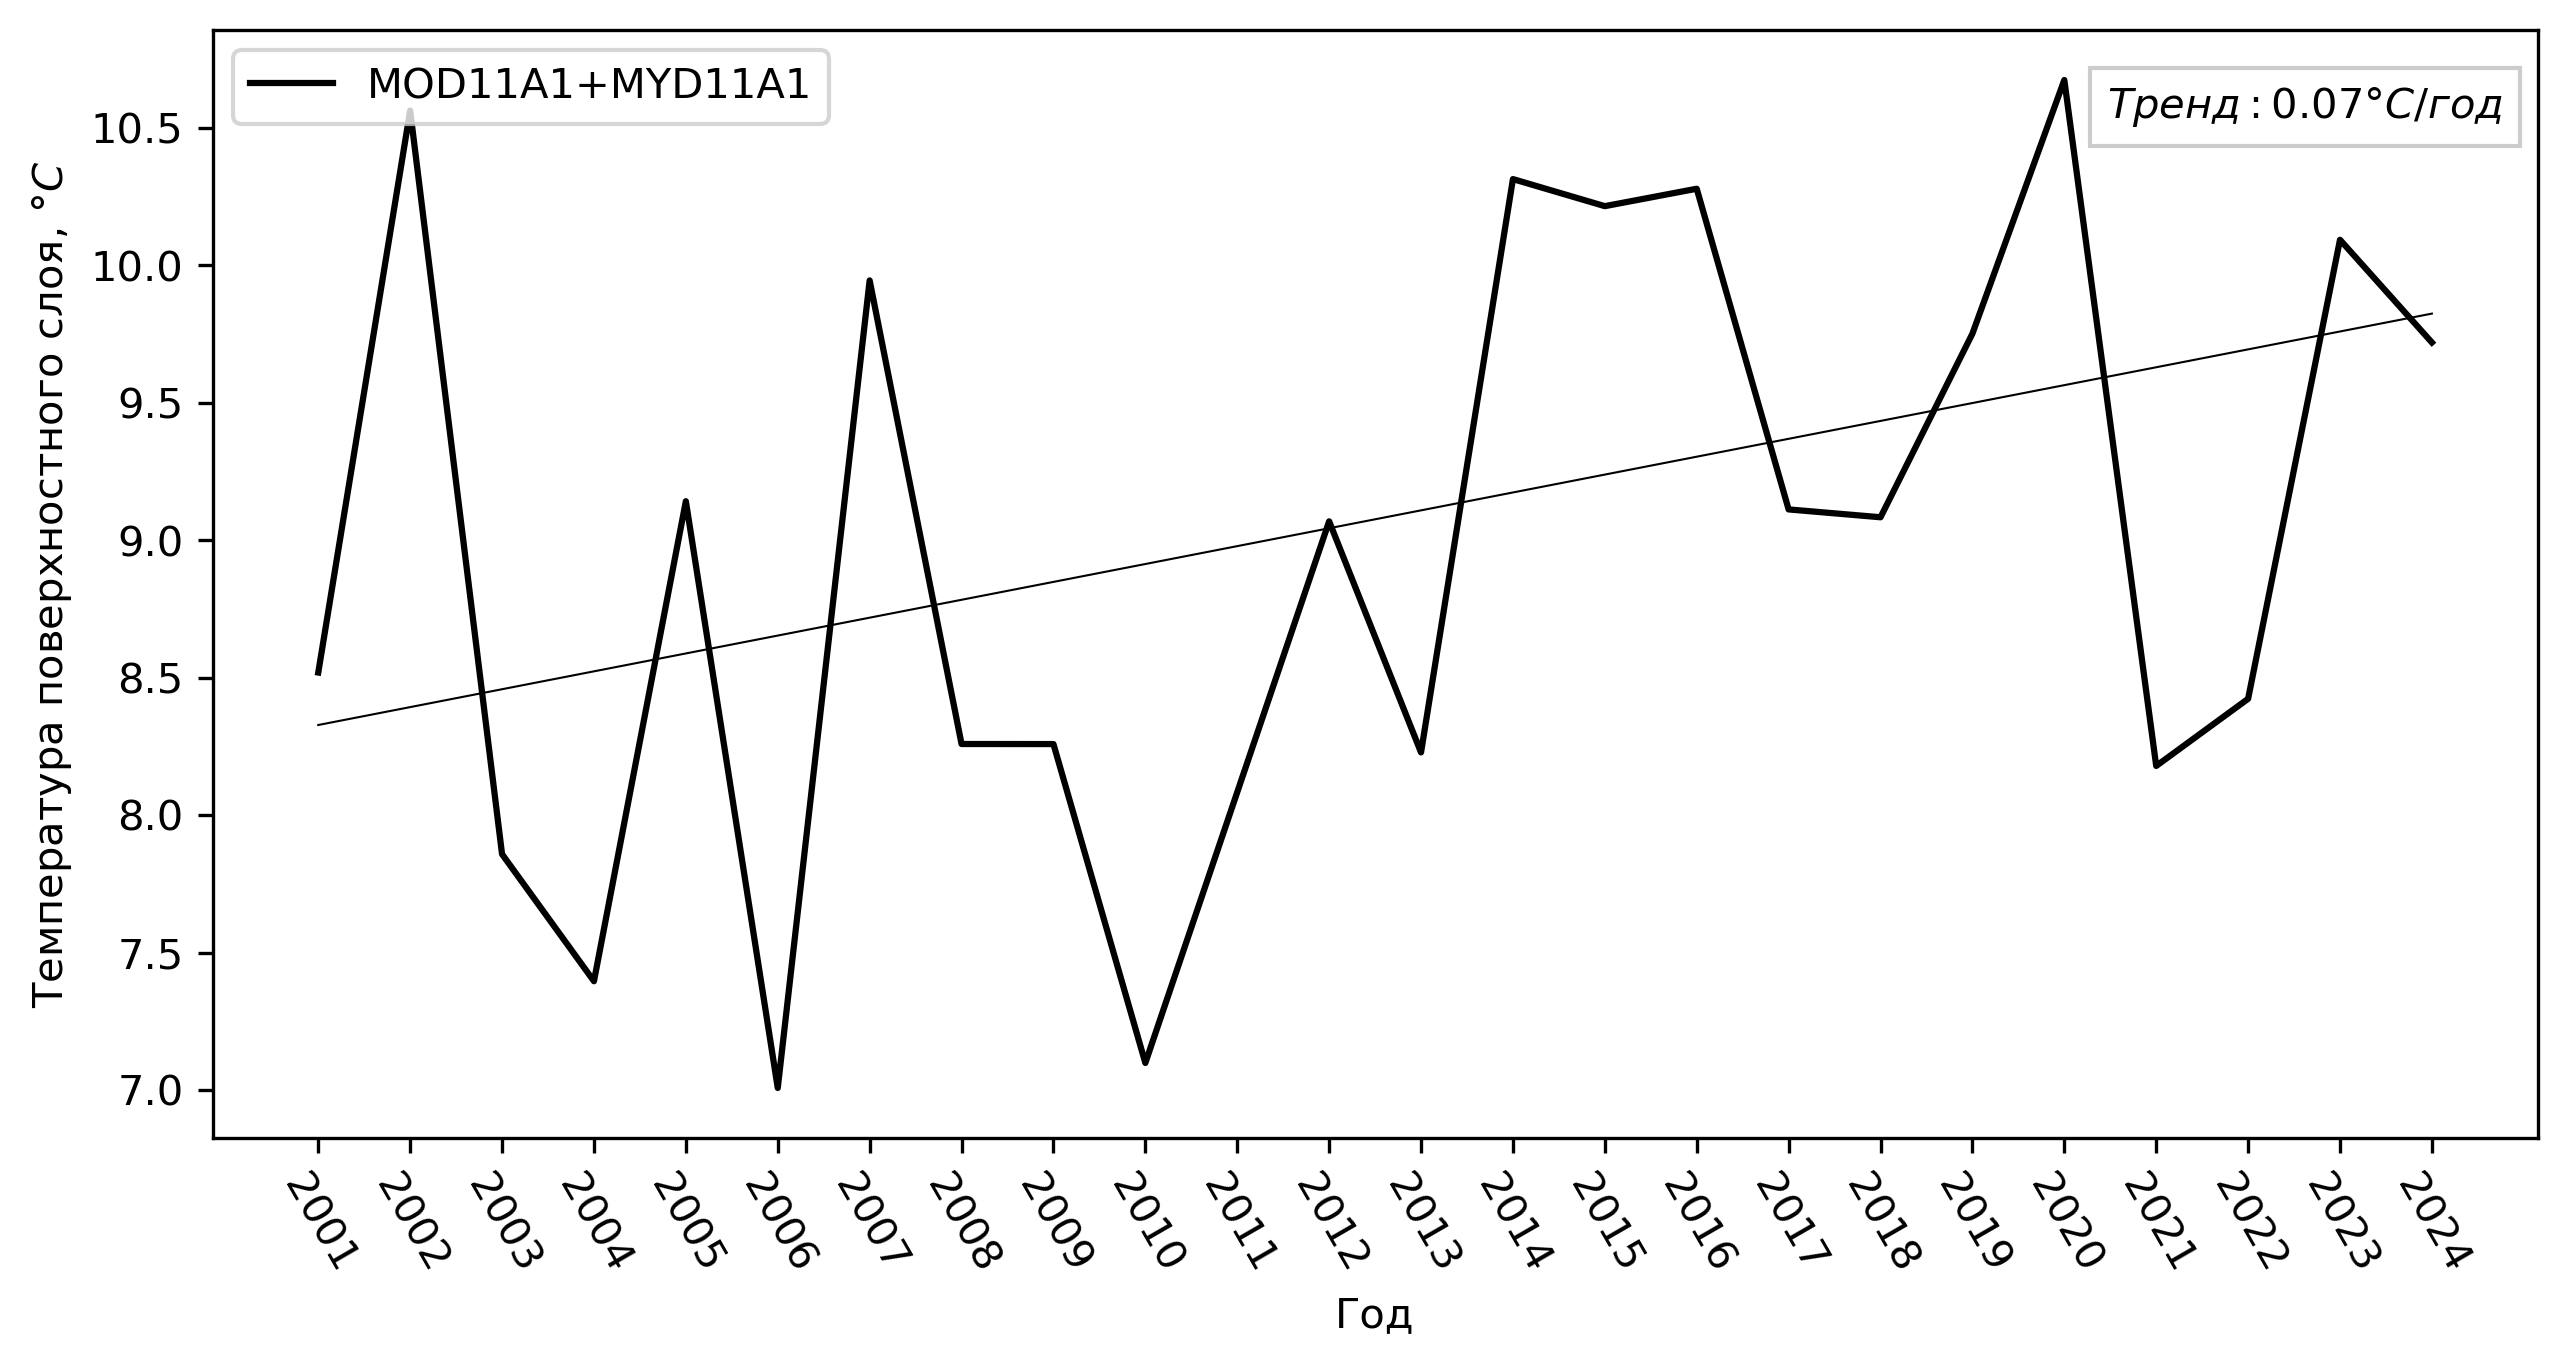

In [6]:
plot_annual_mean(lst_m11, "MOD11A1+MYD11A1", "png/MOD11.png", use_theil=True)

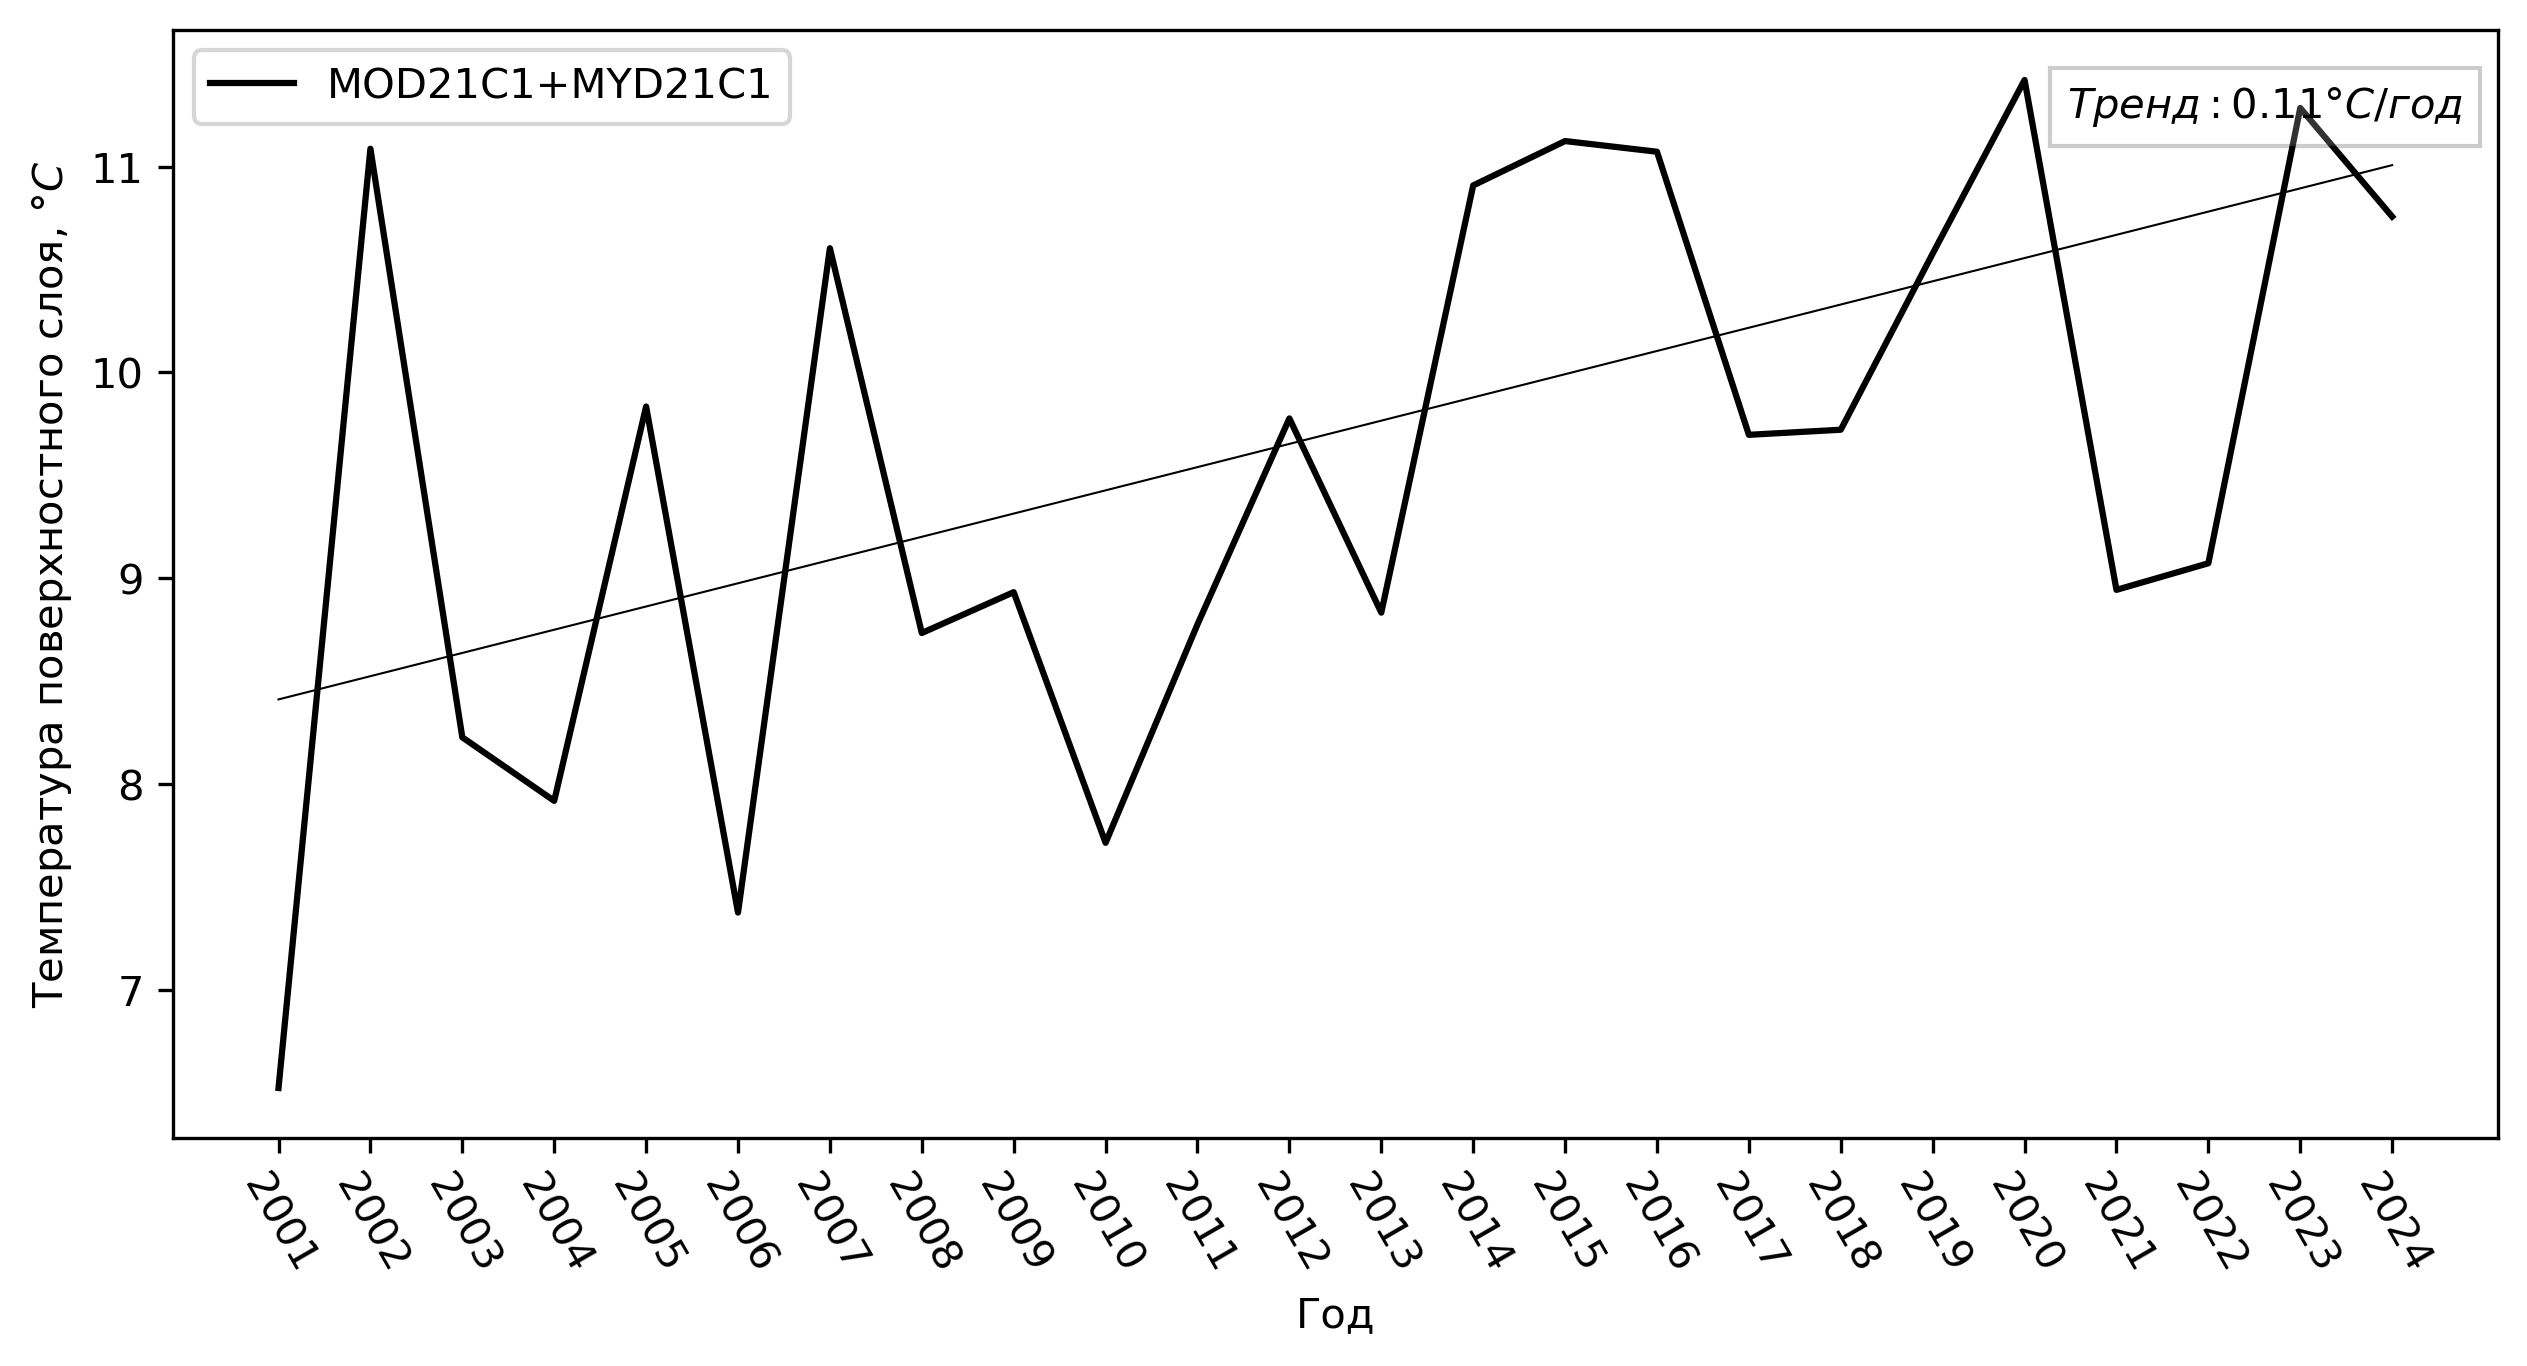

In [7]:
plot_annual_mean(lst_m21, "MOD21C1+MYD21C1", "png/MOD21.png", use_theil=True)

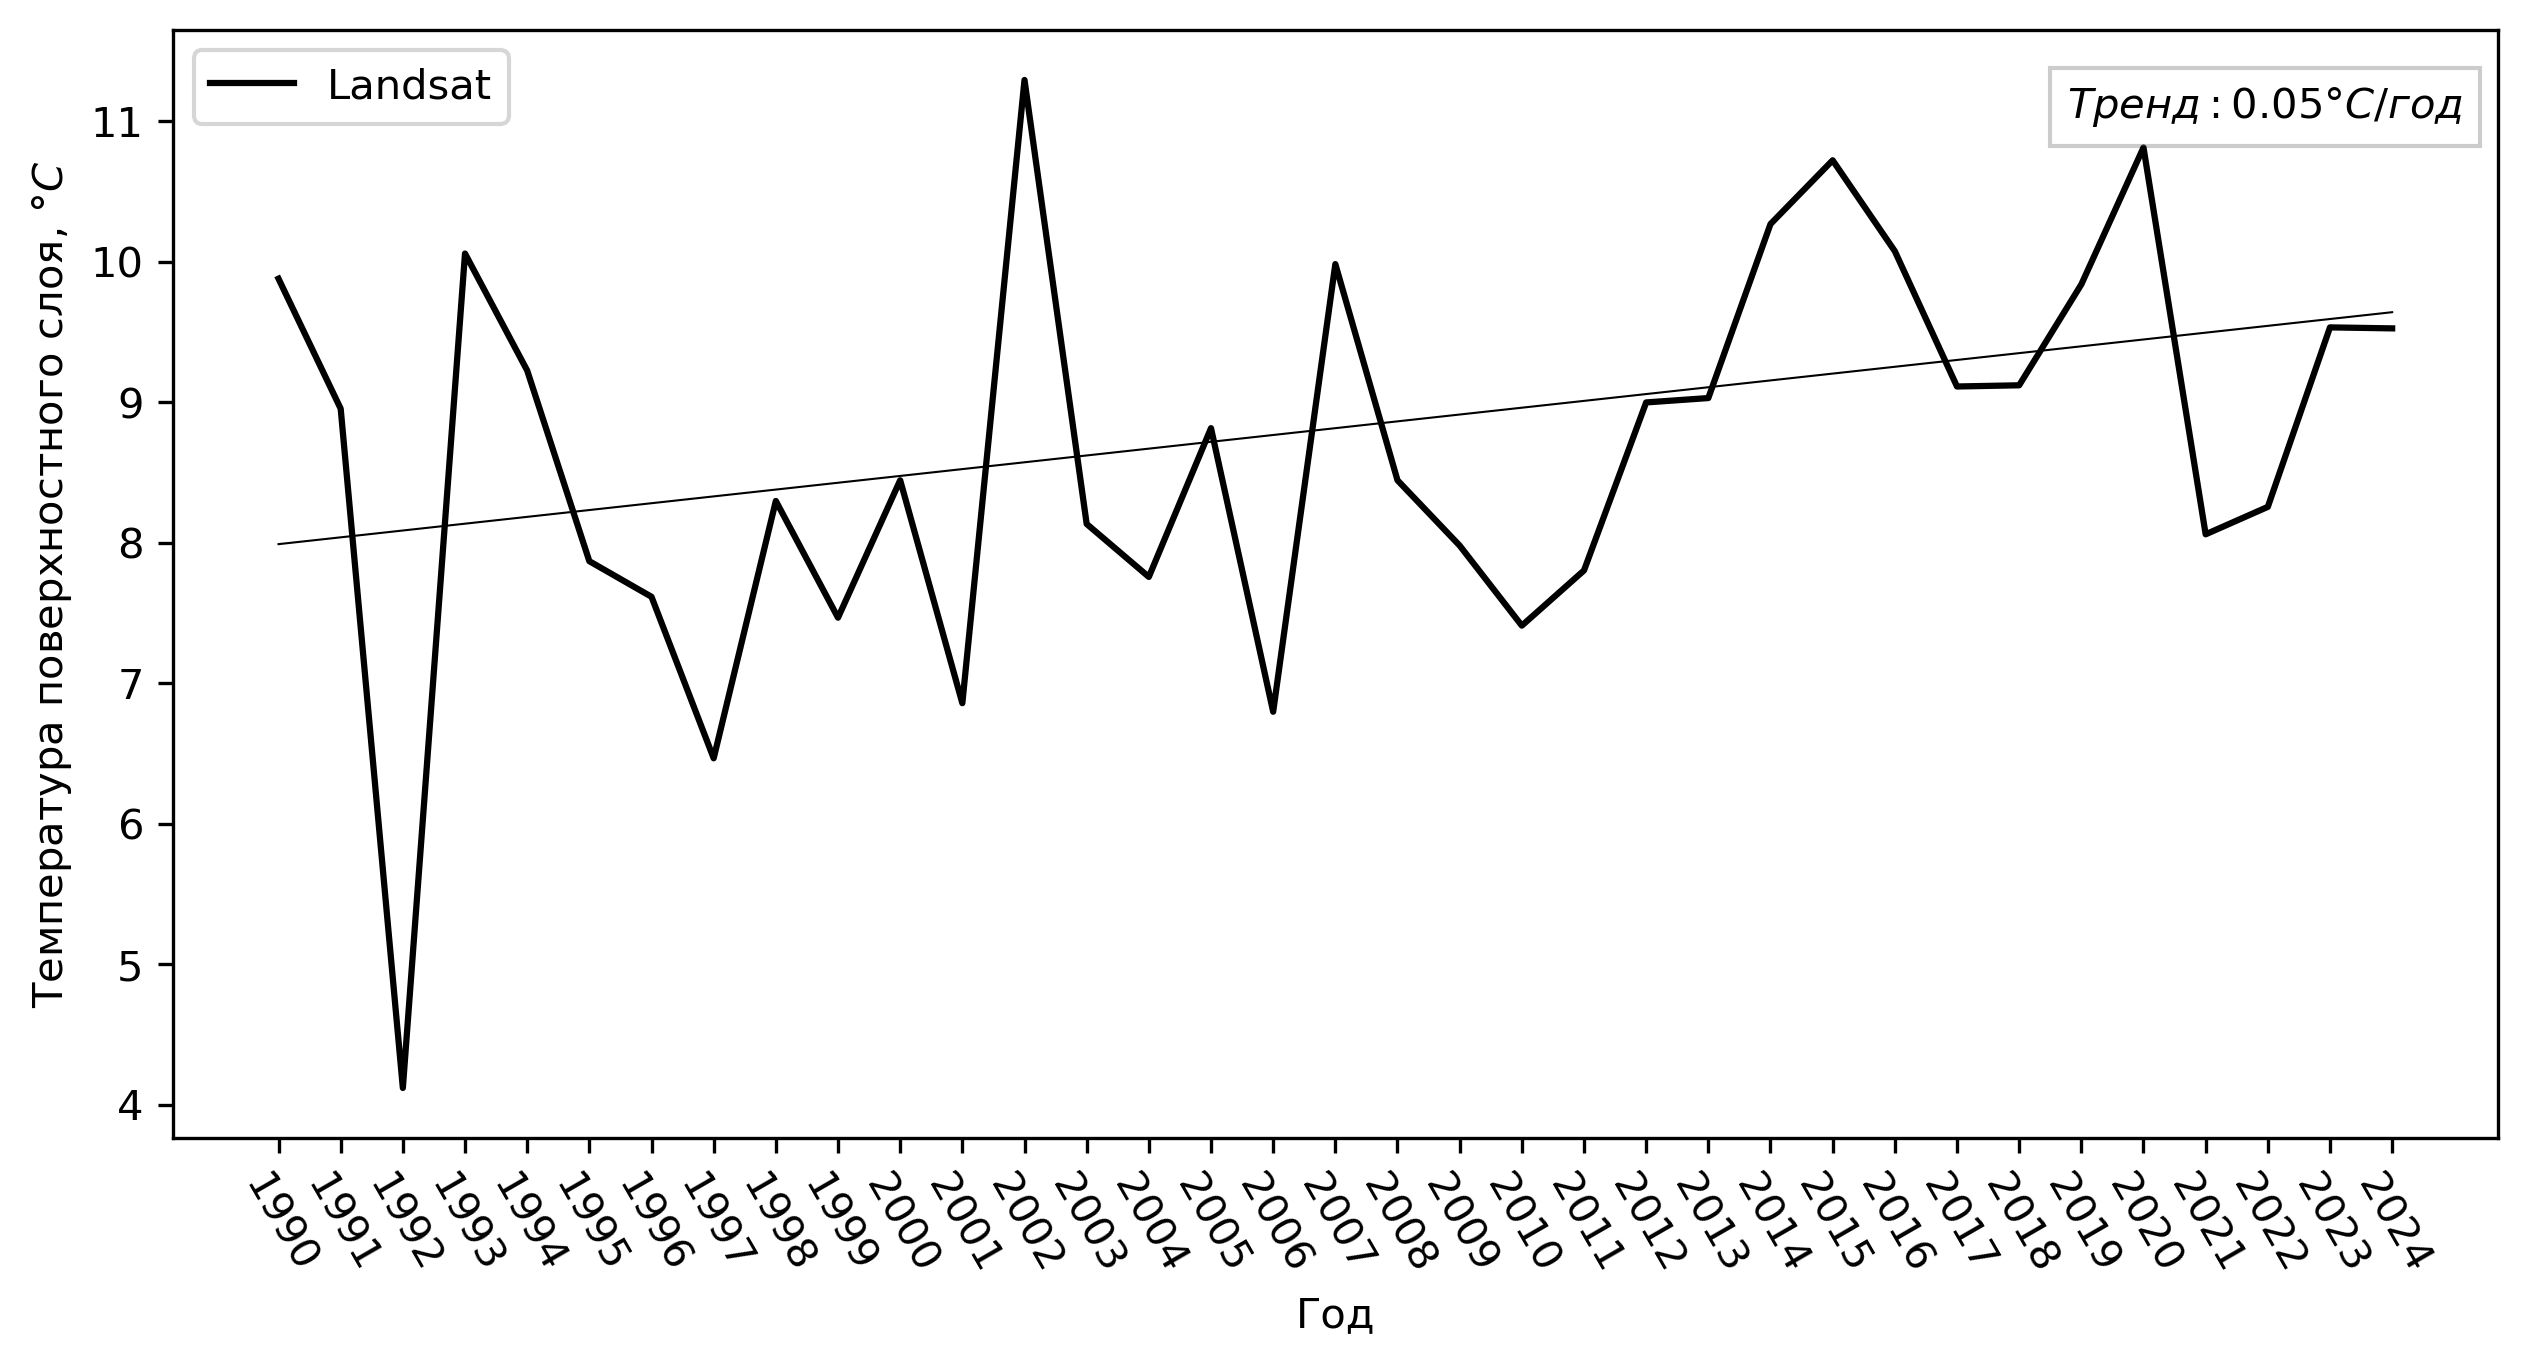

In [23]:
plot_annual_mean(lst_landsat, "Landsat", "png/Landsat.png", use_theil=True)

In [9]:
two_colors = plt.get_cmap('jet', 2)
three_colors = plt.get_cmap('jet', 3)

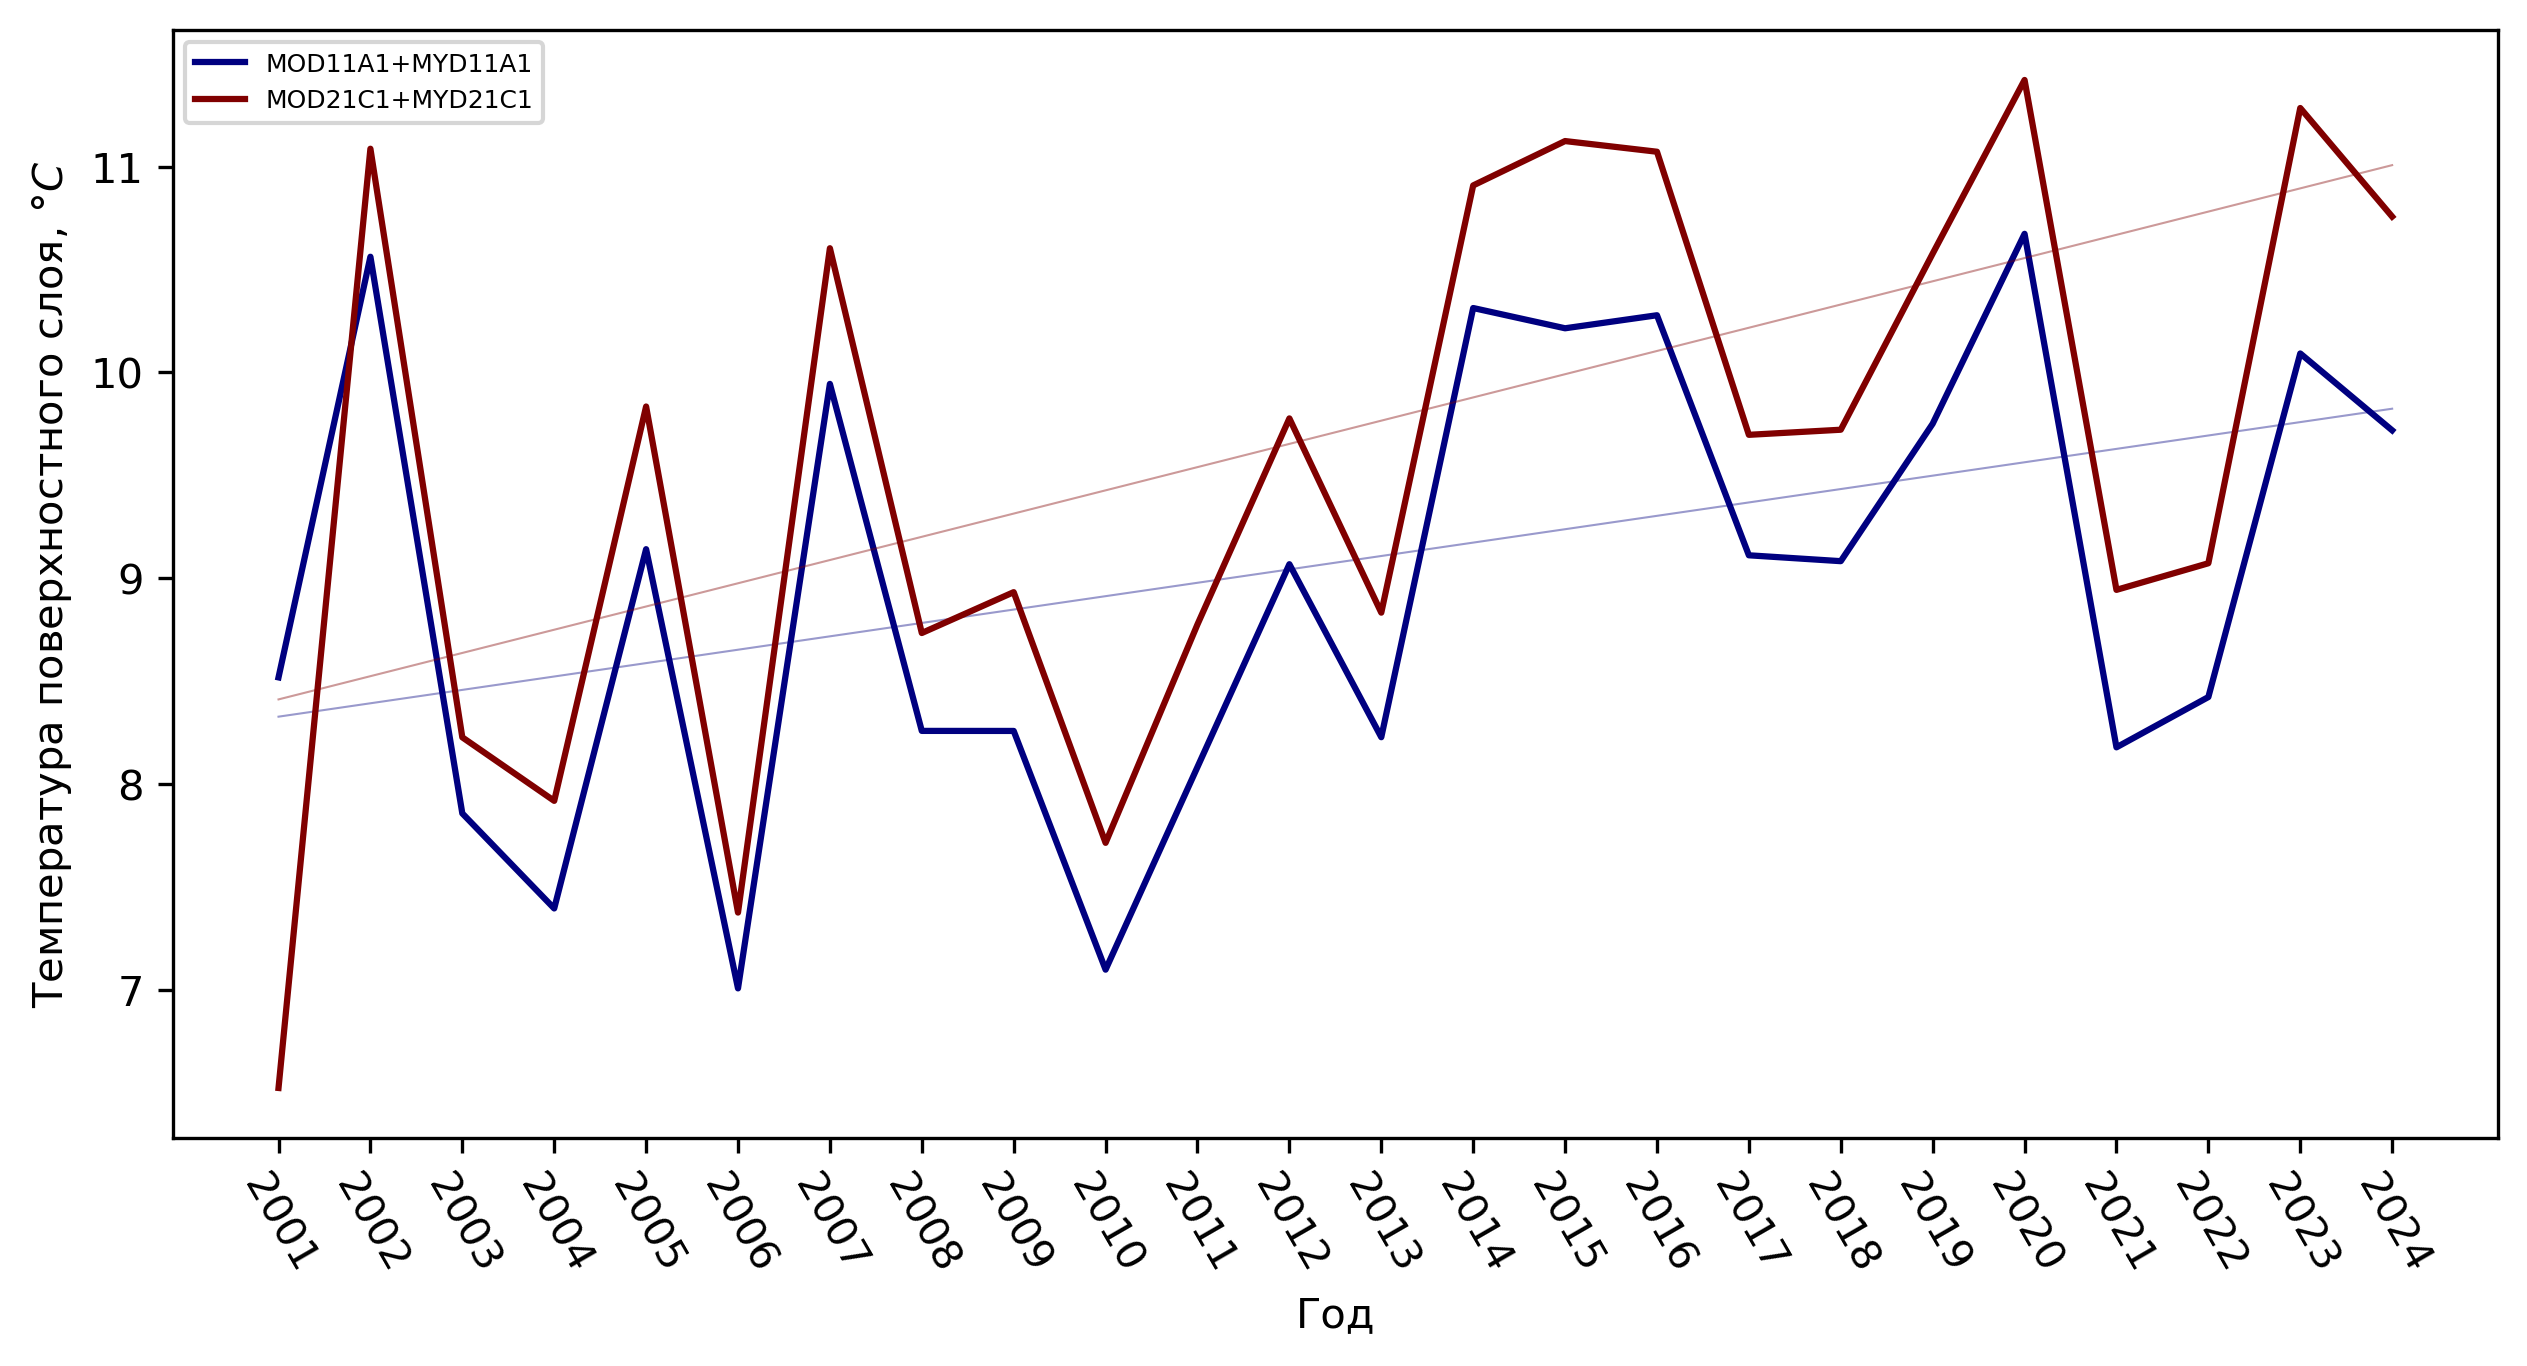

In [19]:
plot_annual_mean_multiple([lst_m11, lst_m21], two_colors, ["MOD11A1+MYD11A1", "MOD21C1+MYD21C1"], "png/MOD_comparison.png", use_theil=True)

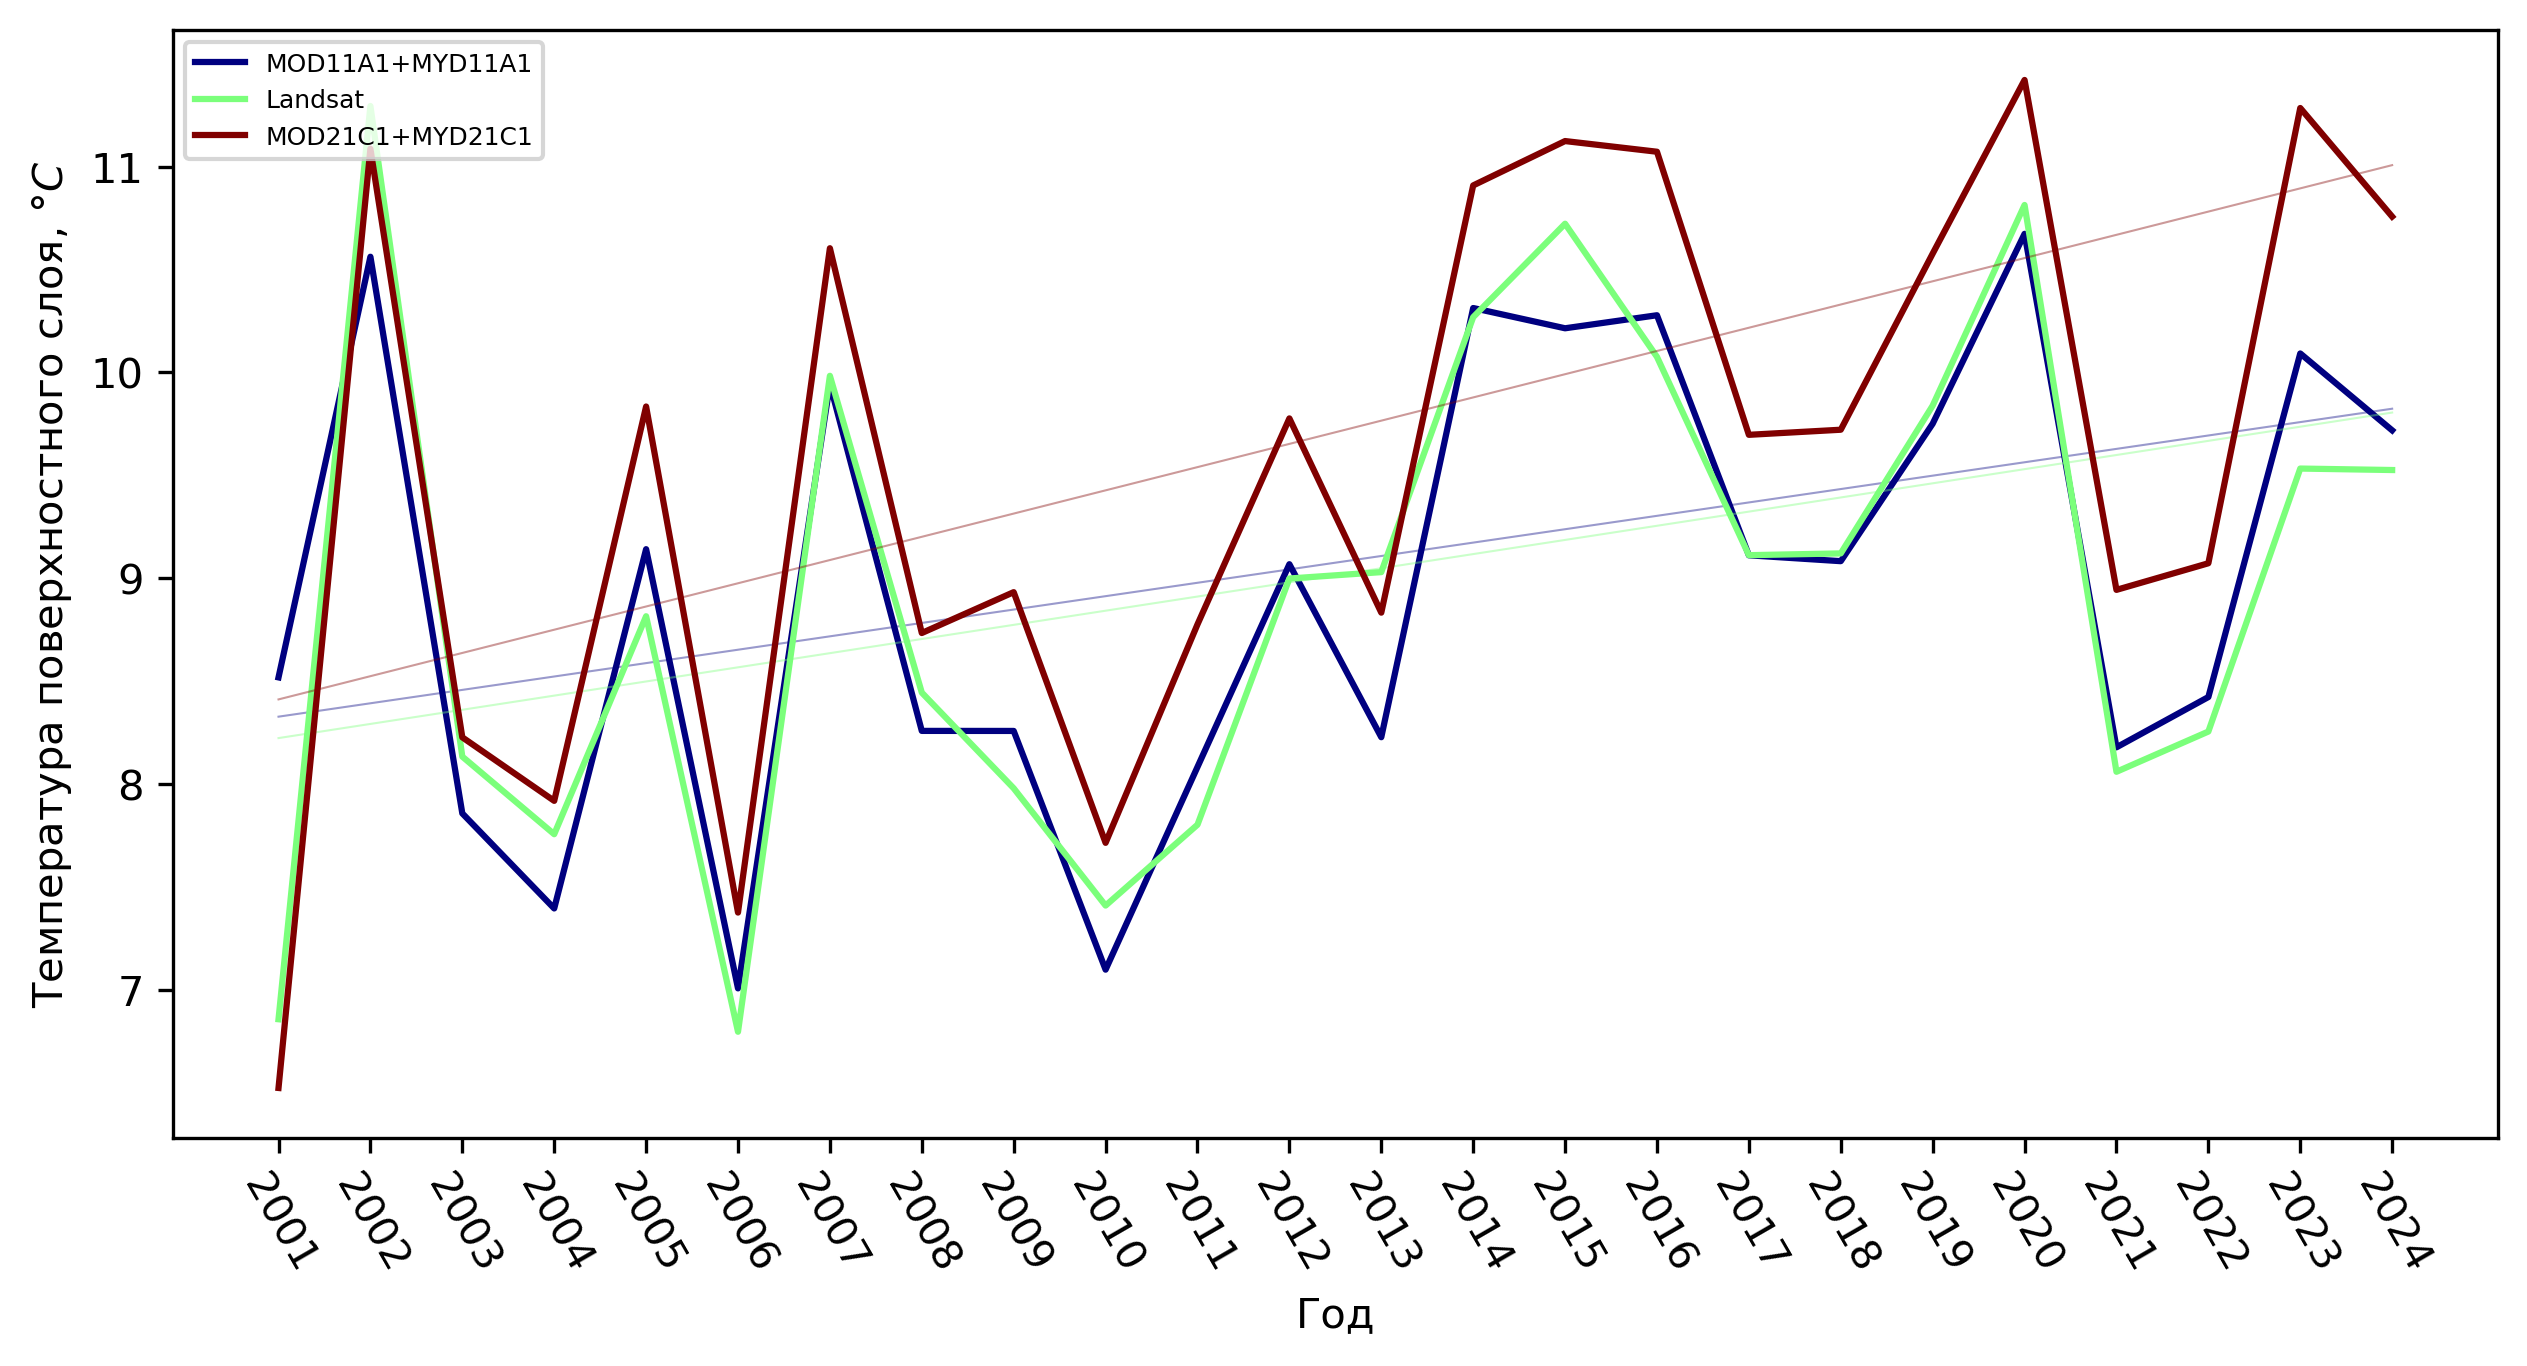

In [20]:
plot_annual_mean_multiple(
   [lst_m11, lst_landsat, lst_m21],
   three_colors, 
   ["MOD11A1+MYD11A1", "Landsat", "MOD21C1+MYD21C1"], 
   "png/MODIS_Landsat_comparison.png", 
   use_theil=True)

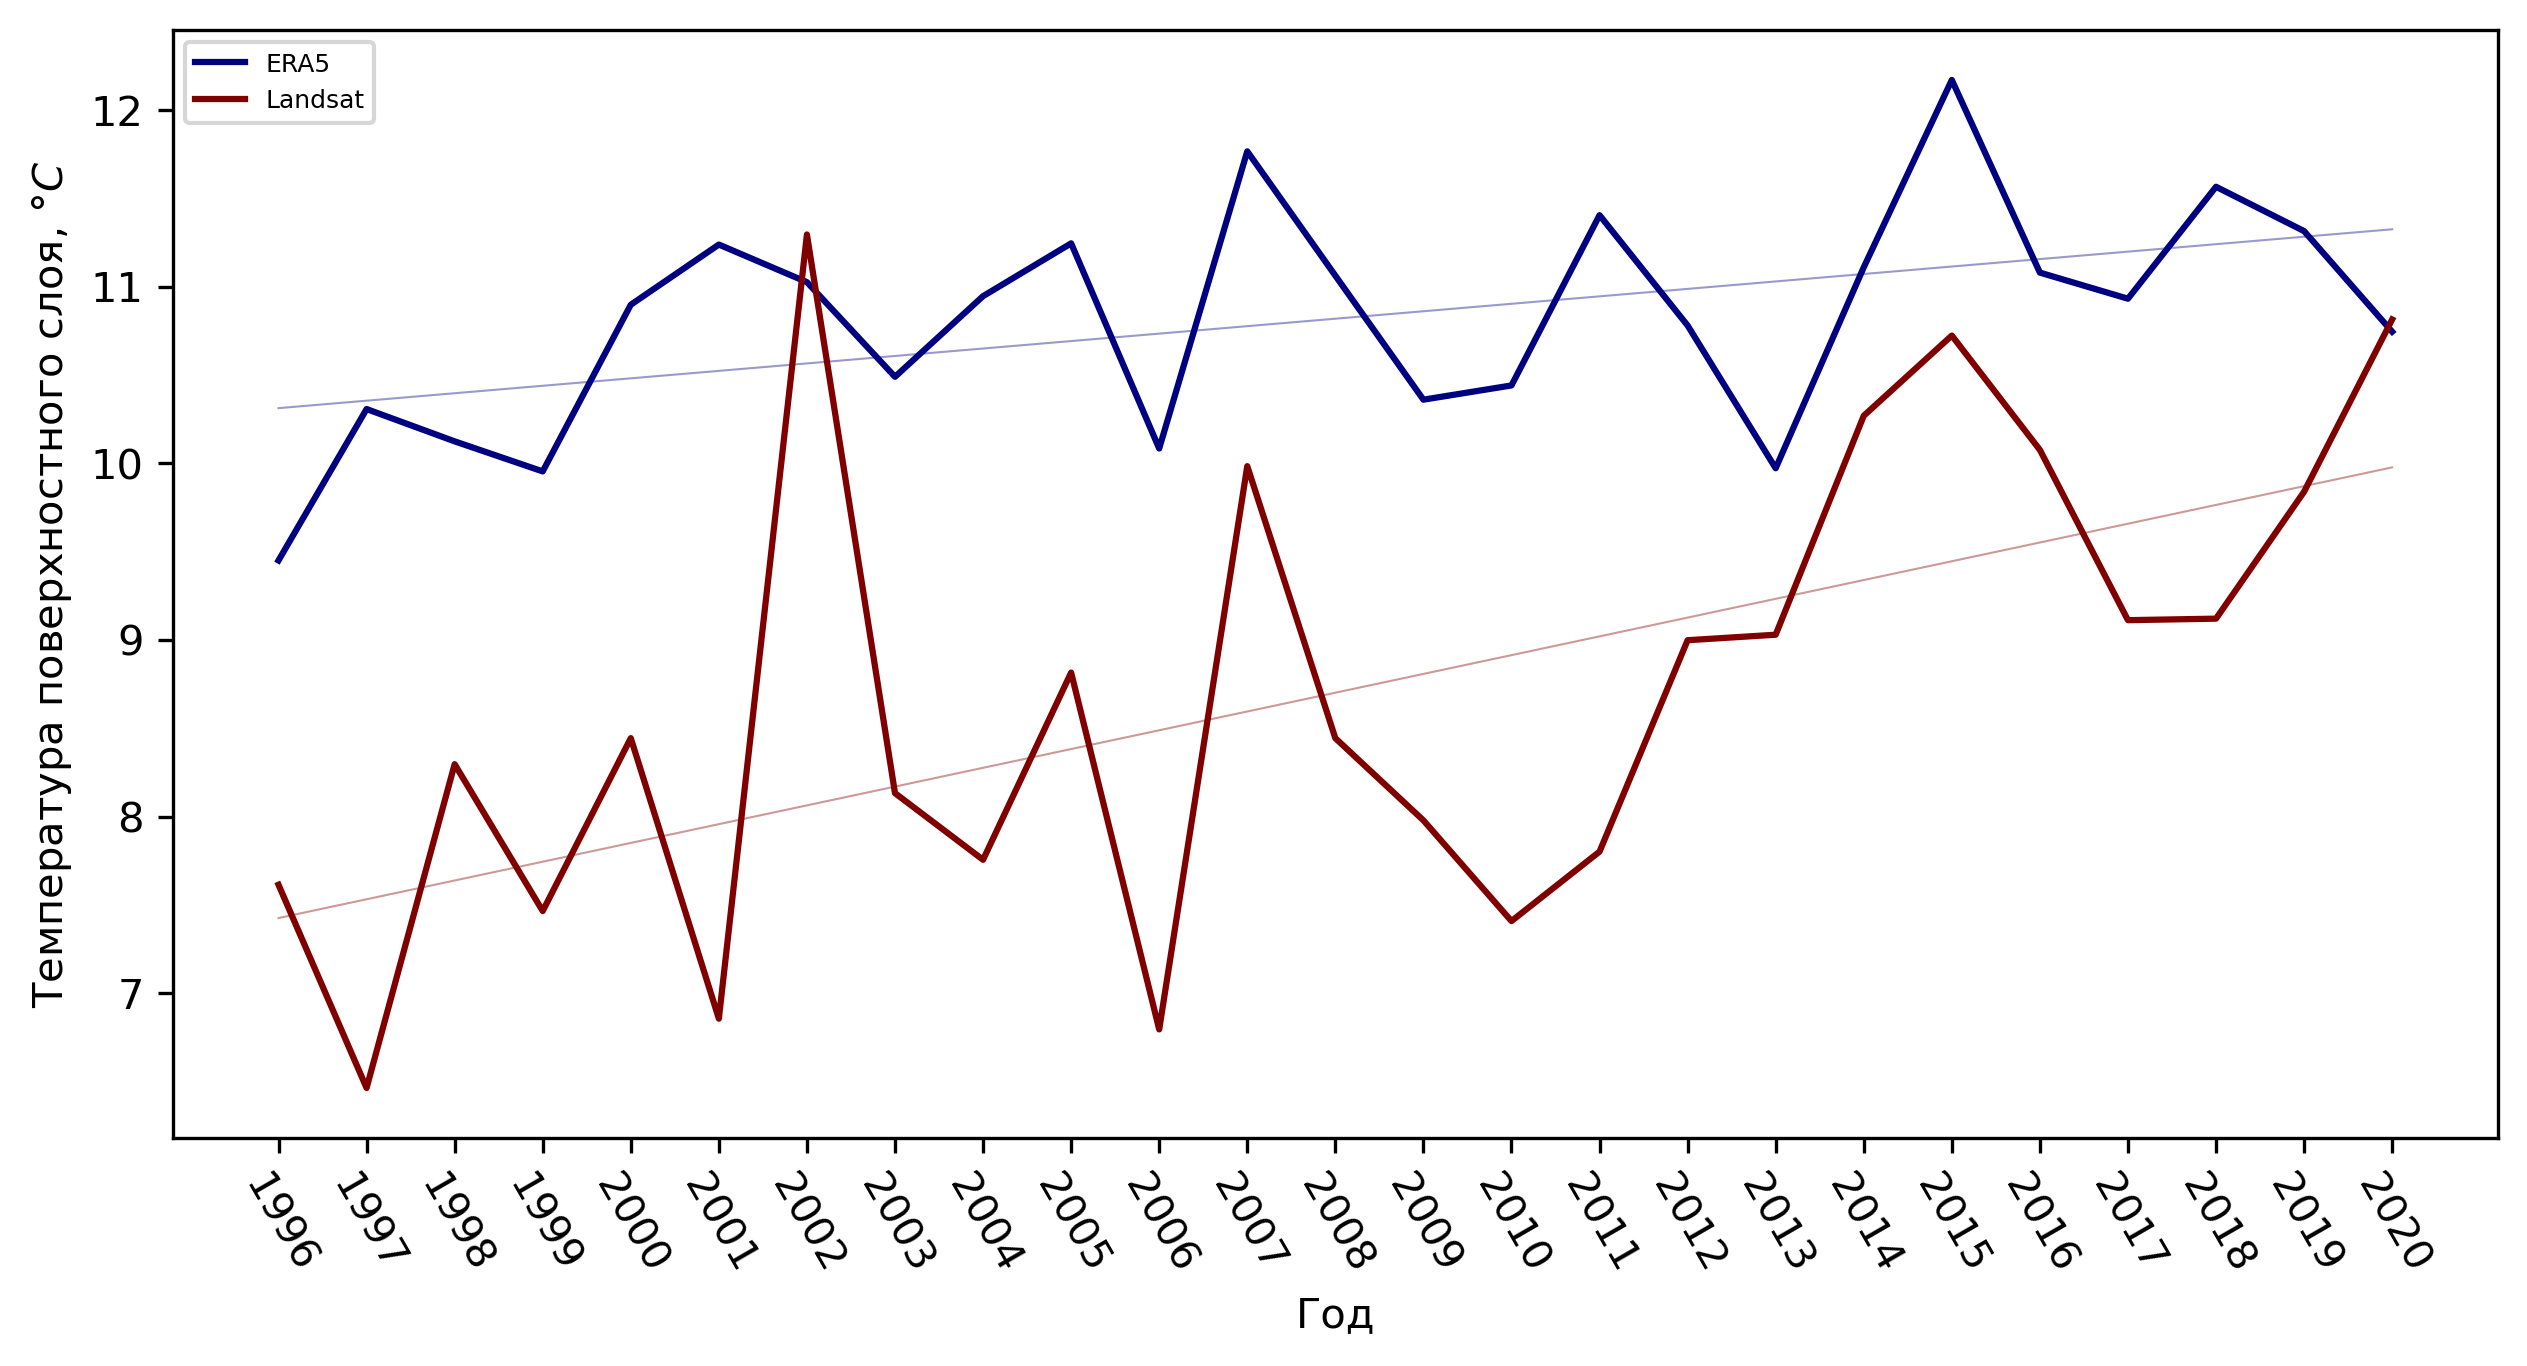

In [21]:
plot_annual_mean_multiple([lst_era5, lst_landsat], two_colors, ["ERA5", "Landsat"], "png/Landsat_ERA5_comparison.png")

# Скользящее окно

In [79]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

In [ ]:
n = 8
xs_m11_mean = running_mean(years_m11, n).reshape(-1,1)
ys_m11_mean = running_mean(temps_m11, n).reshape(-1,1)
xs_m21_mean = running_mean(years_m21, n).reshape(-1,1)
ys_m21_mean = running_mean(temps_m21, n).reshape(-1,1)
xs_landsat_mean = running_mean(years_landsat, n).reshape(-1,1)
ys_landsat_mean = running_mean(temps_landsat, n).reshape(-1,1)

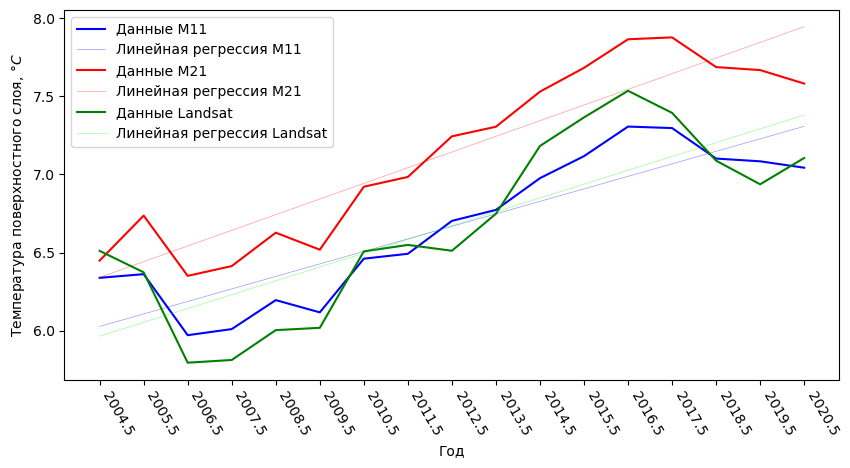

In [85]:
blue_transparent = (0,0,1,0.4)
red_transparent = (1,0,0,0.4)
green_transparent = (0,1,0,0.4)
plot_yearly_mean_multiple([xs_m11_mean, xs_m21_mean, xs_landsat_mean], [ys_m11_mean, ys_m21_mean, ys_landsat_mean], ['b','r','g'], [blue_transparent, red_transparent, green_transparent], ["M11", "M21", "Landsat"])